In [2]:
#loading the libraries and importing the necessary modules.
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

print ('done')

done


In [3]:
# declare variables that contain the class names and the corresponding label.
class_names= ['elephant','farfalla','mucca','pecora','scoiattolo']
class_names_label={class_name:i for i,class_name in enumerate (class_names)}
nb_classes=len(class_names)
print(class_names_label)
IMAGE_SIZE=(300,300)
print('done')

{'elephant': 0, 'farfalla': 1, 'mucca': 2, 'pecora': 3, 'scoiattolo': 4}
done


In [4]:
#define a function called load_data which we can use to load train and test data.
def load_data():
    DIRECTORY="C:\ANIMALS"
    CATEGORY=["seg_train","seg_test"]
    
    output=[]
    
    for category in CATEGORY:
        path=os.path.join(DIRECTORY,category)
        images=[]
        labels=[]
        
        print("loading {}".format(category))
        
        for folder in os.listdir(path):
            label=class_names_label[folder]
            
            for file in os.listdir(os.path.join(path,folder)):
                img_path=os.path.join(os.path.join(path,folder),file)
                
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,IMAGE_SIZE)
                
                images.append(image)
                labels.append(label)
                
        images=np.array(images,dtype='float32')
        labels=np.array(labels,dtype='int32')
        
        output.append((images,labels))
        
    return output
    
    
print('done')



done


In [5]:
#call load_data() function and save training and testing data
(train_images,train_labels),(test_images,test_labels)=load_data()
train_images,train_labels =shuffle(train_images,train_labels,random_state=25)
print('done')

loading seg_train
loading seg_test
done


In [13]:
#Creating a Convolution Neural Network with Keras
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_images,train_labels,batch_size=50,epochs=50,validation_split=0.2)

print('done')

Epoch 1/50
13/13 [==============================] - 78s 4s/step - loss: 7.6583 - accuracy: 0.1969 - val_loss: 1.7223 - val_accuracy: 0.2937
Epoch 2/50
13/13 [==============================] - 47s 4s/step - loss: 1.6251 - accuracy: 0.2828 - val_loss: 1.5661 - val_accuracy: 0.2812
Epoch 3/50
13/13 [==============================] - 46s 4s/step - loss: 1.4119 - accuracy: 0.3844 - val_loss: 1.3881 - val_accuracy: 0.4437
Epoch 4/50
13/13 [==============================] - 48s 4s/step - loss: 1.3011 - accuracy: 0.4187 - val_loss: 1.3274 - val_accuracy: 0.4688
Epoch 5/50
13/13 [==============================] - 49s 4s/step - loss: 1.1779 - accuracy: 0.4828 - val_loss: 1.3418 - val_accuracy: 0.4062
Epoch 6/50
13/13 [==============================] - 50s 4s/step - loss: 1.0978 - accuracy: 0.5500 - val_loss: 1.2262 - val_accuracy: 0.4625
Epoch 7/50
13/13 [==============================] - 49s 4s/step - loss: 0.9488 - accuracy: 0.6328 - val_loss: 1.2228 - val_accuracy: 0.4938
Epoch 8/50
13/13 [==

the confusion matrix is :-
[[18  1  7  9  5]
 [ 0 30  3  6  1]
 [ 8  1 23  4  4]
 [ 7  6 10 14  3]
 [ 6  4  3  7 20]]


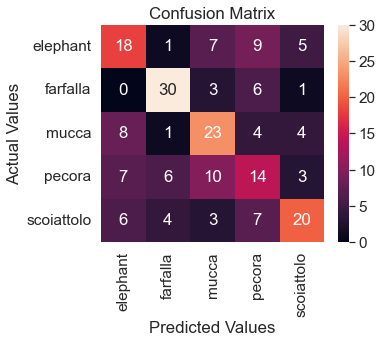

done


In [14]:
#the confusion_matrix
import seaborn as sns 

from sklearn.metrics import confusion_matrix
pred=model.predict(test_images).argmax(axis=1)
confusion__matrix=confusion_matrix(test_labels,pred)
print('the confusion matrix is :-')
print(confusion__matrix)

#creating a dataframe for an array_formatted confusionmatrix
cm_df=pd.DataFrame(confusion__matrix,index=['elephant','farfalla','mucca','pecora','scoiattolo'],columns=['elephant','farfalla','mucca','pecora','scoiattolo'])

#plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print('done')

accuracy is :-
0.525


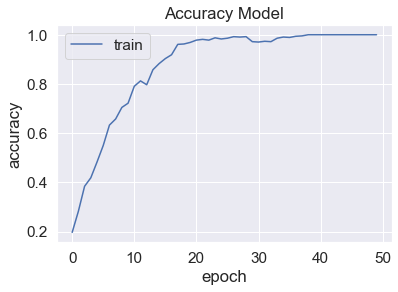

done


In [15]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_labels,pred)
print('accuracy is :-')
print (accuracy)
#showing the accuracy curve
plt.plot(history.history['accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc="upper left")
plt.show()
print('done')

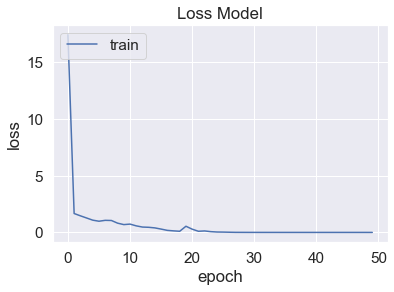

done


In [18]:
#loss curve
plt.plot(history.history['loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc="upper left")
plt.show()
print('done')

done


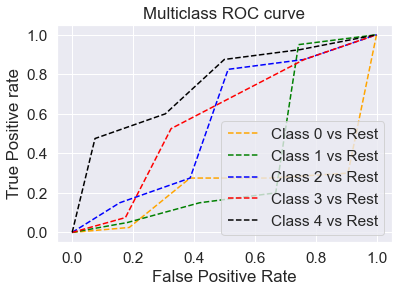

In [25]:
#ROC curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_labels, pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=100);  
print('done')